HW 5


# 2

In [349]:
#HW5
import numpy as np
import matplotlib.pyplot as plt

In [350]:
def S(x,y):
    s = 2*(2-x**2-y**2)
    return s 

In [351]:

#parameters
alpha = 1
N = M = 20 # 격자 수

# 격자 생성
x = np.linspace(-1,1,N)
y = np.linspace(-1,1,M)

# 격자 좌표 생성
X,Y = np.meshgrid(x,y) 

h = x[1] - x[0] # 격자 간격

t = 0 #initial time
dt = 0.01 #time step

beta = alpha * dt / (2*h**2)

In [352]:
phi = np.zeros((N, N))# NxN 격자 전체를 0으로 초기화
I = np.eye(N-2) # 내부 격자에 대한 단위 행렬
# 외부 격자는 phi=0이라는 조건이 주어졌으므로, 해를 구해야 할 내부 격자점만 (n-2)개 (경계 제외)


In [353]:
L = np.zeros((N-2, N-2)) # 내부 격자에 대한 행렬 (N-2)x(N-2)

for i in range(N-2):
    L[i,i] = -2 # 주대각선 

    if i == 0:
        L[i,i+1] = 1 # 첫 번째 격자점은 오른쪽 이웃만 있음

    elif i == N-3:
        L[i,i-1] = 1 # 마지막 격자점은 왼쪽 이웃만 있음

    else:
        L[i,i+1] = 1 # 오른쪽 이웃
        L[i,i-1] = 1 # 왼쪽 이웃


In [354]:
A = I - beta * L # 시간에 따른 행렬 A??
#phiϕ의 시간에 따른 변화를 리스트 형태로 저장할 공간 만듬.
phi_list = [phi,] # phiϕ의 변화를 저장할 리스트

R = S(X[1:-1, 1:-1], Y[1:-1, 1:-1]) * dt + (I - beta * L) @ ((I - beta * L) @ phi[1:-1, 1:-1].T).T

psi = np.linalg.solve(A, R) # ψ=A^(-1)R 선형 시스템 solve
phi_new = psi @ np.linalg.inv((I - beta * L).T) # ϕ^(n+1)= ψA(-T) 선형 시스템 solve

phi_full = np.zeros((N, N)) # phi_full 전체 행렬 초기화
phi_full[1:-1, 1:-1] = phi_new # 내부 격자에 대한 해를 업데이트

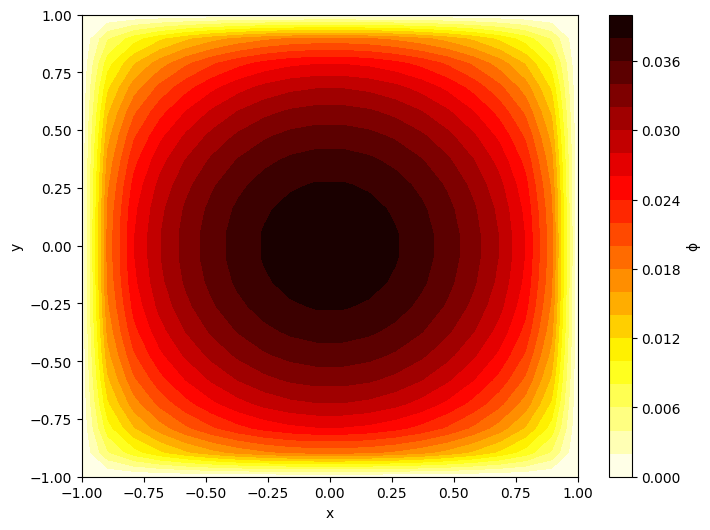

In [355]:
# 시각화
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi_full, levels=20,cmap='hot_r') #등고선 채워 그리기
plt.colorbar(label='ϕ')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

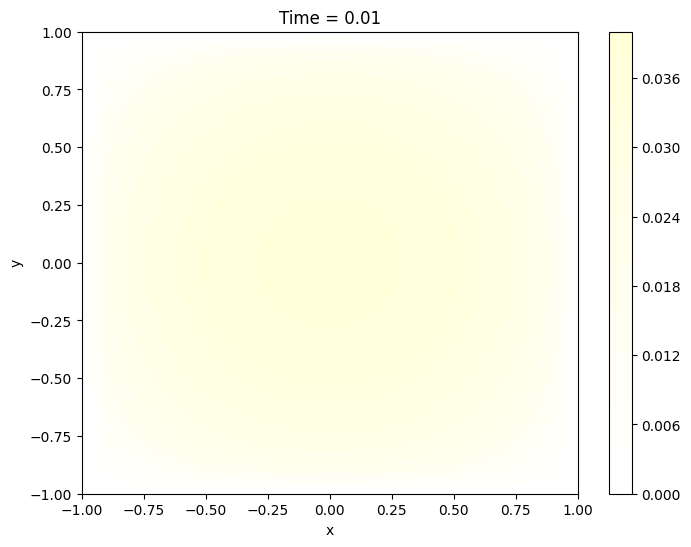

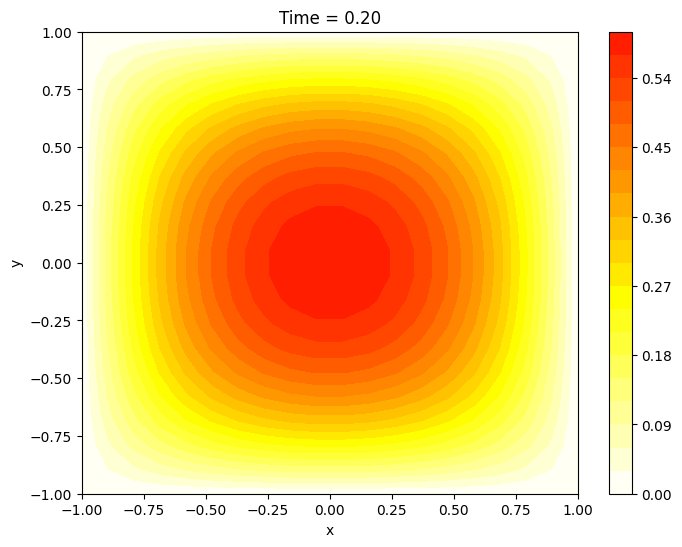

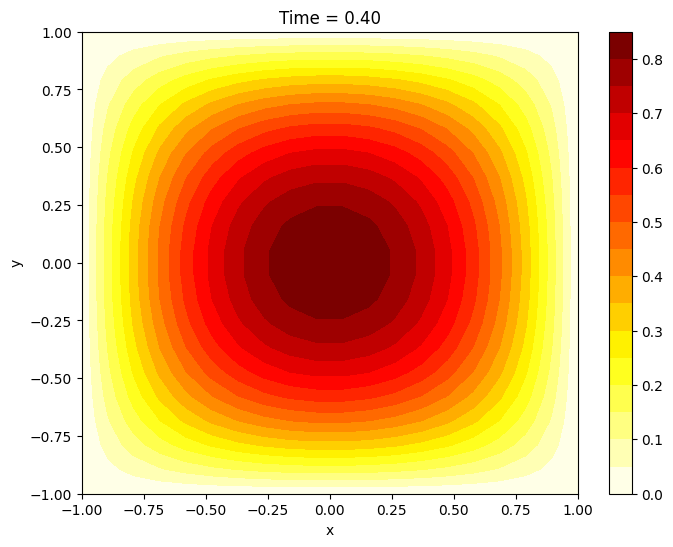

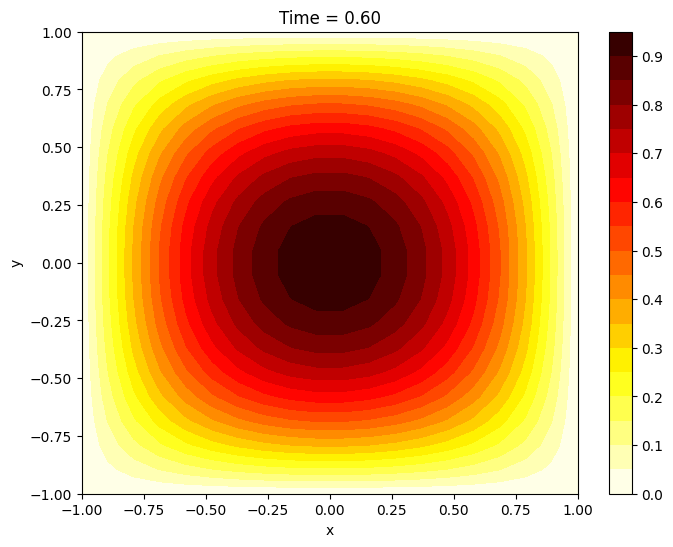

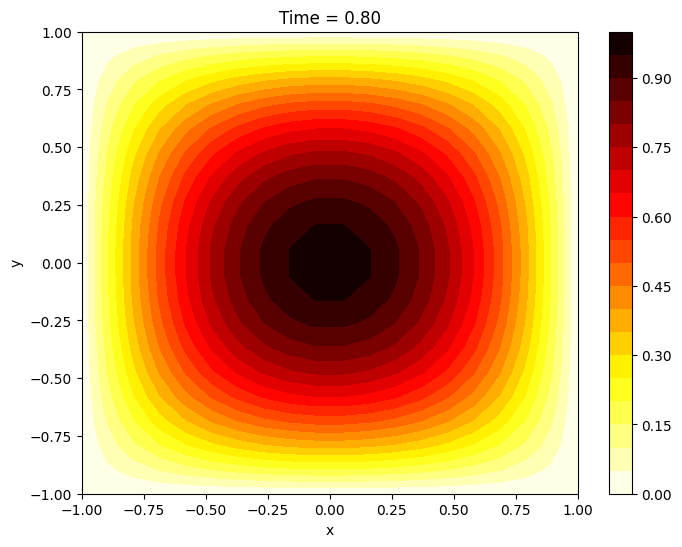

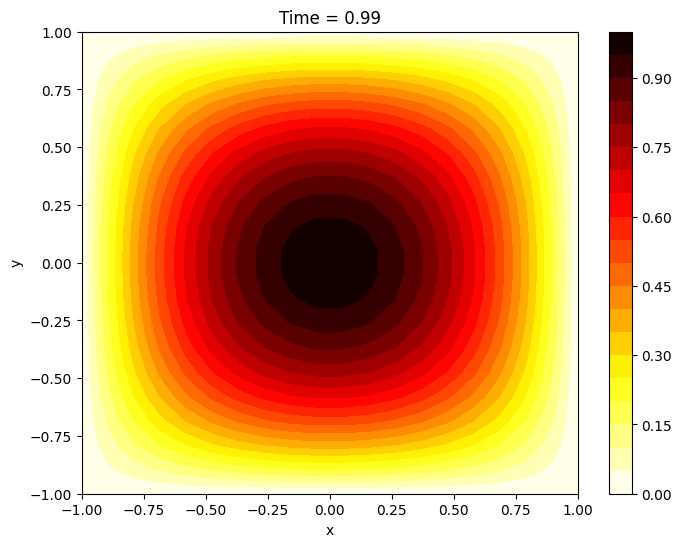

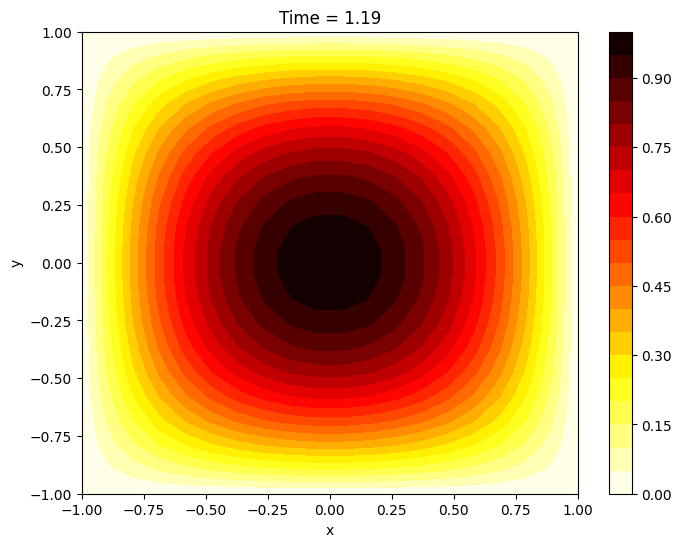

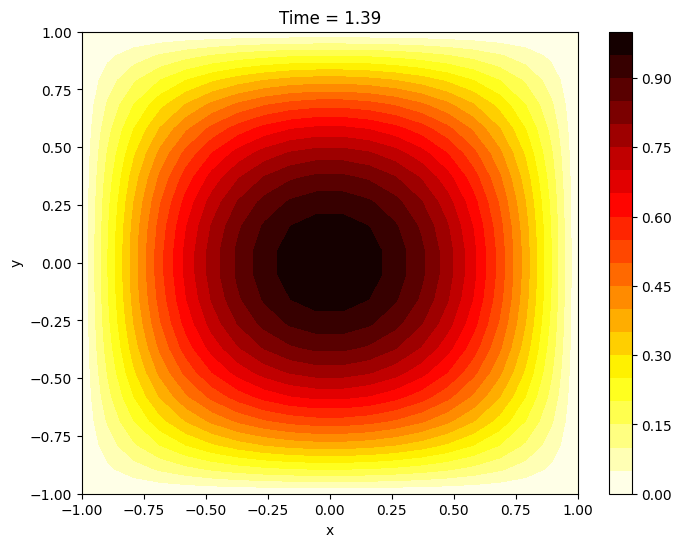

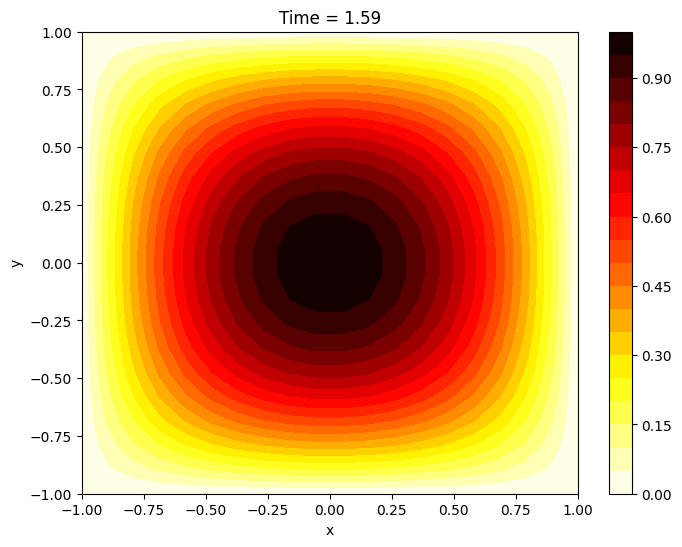

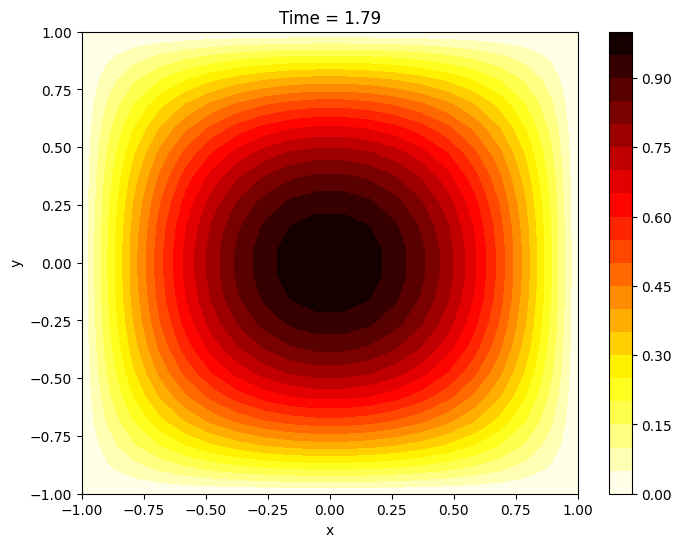

In [356]:
# 시간에 따른 phiϕ의 변화를 계산
phi_list = [phi,] # 초기 phiϕ를 리스트에 추가

j_list = np.linspace(1,179,10, dtype=int)  # 시각화할 인덱스 선택

for j in range(180):
    t = t + dt

    R = S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt + (I + beta * L) @ ((I + beta * L) @ phi_list[j][1:-1, 1:-1].T).T
    psi = np.linalg.solve(A, R)  # solve the linear system
    phi_new = np.dot(psi, np.linalg.inv(A.T))

    # 전체 phi 행렬에 내부 영역만 채워 넣음
    phi_full = np.zeros((N, N))  # initialize full pi
    phi_full[1:-1, 1:-1] = phi_new
    phi_list.append(phi_full)
 
# phi 전체 범위 계산 (루프 이후에 계산)
phi_min = np.min([np.min(p) for p in phi_list])
phi_max = np.max([np.max(p) for p in phi_list])


# 시각화
for j in j_list:  # 첫 번째와 마지막 시간에 대해서만 시각화
    plt.figure(figsize=(8,6))
    plt.contourf(X, Y, phi_list[j], levels=20, cmap='hot_r', vmin=phi_min, vmax=phi_max)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Time = {j*dt:.2f}')
    plt.show()



In [357]:
def phi_exact(x,y):
    phi = (1-x**2) * (1-y**2)
    return phi

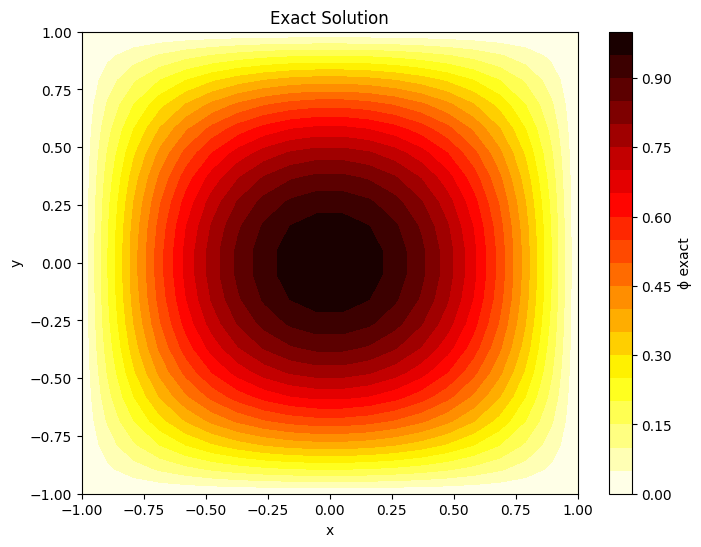

In [358]:
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi_exact(X, Y), levels=20, cmap='hot_r', vmin=0, vmax=1)
plt.colorbar(label='ϕ exact')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Exact Solution')
plt.show()


# 3

수치해석 결과의 order of accuracy를 시간과 공간에 대하여 분석.

In [359]:
# Space
h_list = []
error_list = []

for N in range(5,21,1):

    alpha = 1 
    x_list = np.linspace(-1, 1, N) # x grid points 
    y_list = np.linspace(-1, 1, N) # y grid points 
    X, Y = np.meshgrid(x_list, y_list) # create a meshgrid
    h = x_list[1] - x_list[0] # grid spacing
    dt = 0.005 # time step
    t = 0 # initial time
    beta = alpha * dt / (h**2) / 2 

    phi = np.zeros((N, N)) # initialize pi       
    I = np.eye(N-2) # identity matrix
    L = np.zeros((N-2, N-2)) # initialize pi

    phi_list = [phi,]

    for i in range(N-2):
        L[i, i] = -2  # 주대각선

        if i - 1 >= 0:
            L[i, i-1] = 1  # 왼쪽 이웃

        if i + 1 < (N-2):
            L[i, i+1] = 1  # 오른쪽 이웃

    A = (I - beta * L)

    for j in range(1000):
        t = t + dt
        
        R = S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt \
            + (I + beta * L) @ ((I + beta * L) @ phi_list[j][1:-1, 1:-1].T).T
        psi = np.linalg.solve(A, R)  # solve the linear system
        phi_new = np.dot(psi, np.linalg.inv(A.T))
        phi_full = np.zeros((N, N))  # initialize full pi
        phi_full[1:-1, 1:-1] = phi_new
        phi_list.append(phi_full)
        
    error_list.append(np.linalg.norm(phi_list[-1] - phi_exact(X, Y), 2)*h)
    h_list.append(h)

In [360]:
print(h_list)
print(np.log10(h_list))

[np.float64(0.5), np.float64(0.4), np.float64(0.33333333333333326), np.float64(0.2857142857142857), np.float64(0.25), np.float64(0.2222222222222222), np.float64(0.19999999999999996), np.float64(0.18181818181818188), np.float64(0.16666666666666663), np.float64(0.15384615384615385), np.float64(0.1428571428571428), np.float64(0.1333333333333333), np.float64(0.125), np.float64(0.11764705882352944), np.float64(0.11111111111111116), np.float64(0.10526315789473684)]
[-0.30103    -0.39794001 -0.47712125 -0.54406804 -0.60205999 -0.65321251
 -0.69897    -0.74036269 -0.77815125 -0.81291336 -0.84509804 -0.87506126
 -0.90308999 -0.92941893 -0.95424251 -0.97772361]


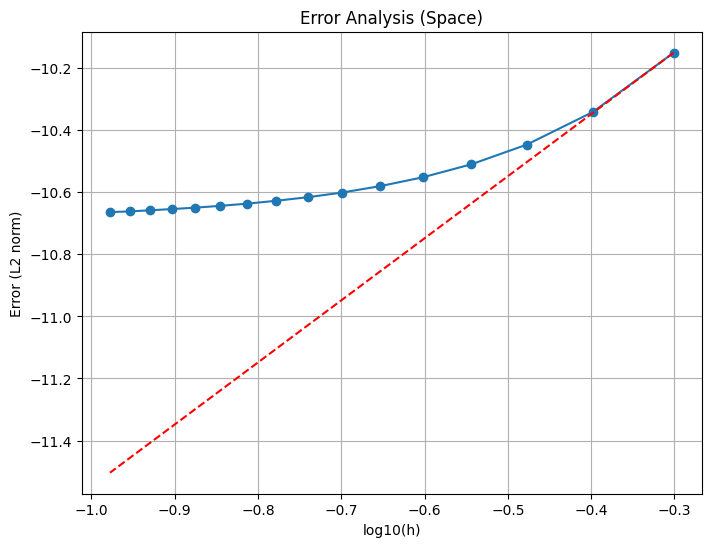

In [361]:
plt.figure(figsize=(8,6))
plt.plot(np.log10(h_list), np.log10(error_list), marker='o', label='Error')
plt.xlabel('log10(h)')
plt.ylabel('Error (L2 norm)') 
plt.plot(np.log10(h_list), 2*(np.log10(h_list)-np.log10(h_list[0]))+np.log10(error_list[0]), linestyle='--', color='r', label='Slope 2')
plt.title('Error Analysis (Space)')
plt.grid()


In [362]:
#time
t_list = []
error_list = []
N = M = 20  # Fixed grid size for time analysis
t_final = 3  

for p in range(5, 11, 1):
    alpha = 1
    x_list = np.linspace(-1, 1, N)  # x grid points
    y_list = np.linspace(-1, 1, M)  # y grid points
    X, Y = np.meshgrid(x_list, y_list)  # create a meshgrid
    h = x_list[1] - x_list[0]  # grid spacing
    dt = 0.006* ( p**2 ) # time step, increasing with p
    steps = int(t_final/dt) # dt에 따른 step 수 조정
    beta = alpha * dt / (h ** 2) / 2

    phi = np.zeros((N, M))  # initialize phi
    I = np.eye(N - 2)  # identity matrix
    L = np.zeros((N - 2, N - 2))  # initialize L

    phi_list = [phi, ]

    for i in range(N - 2):
        L[i, i] = -2  # main diagonal

        if i - 1 >= 0:
            L[i, i - 1] = 1  # left neighbor

        if i + 1 < (N - 2):
            L[i, i + 1] = 1  # right neighbor

    A = (I - beta * L)

    for j in range(steps):
        t = t + dt
        
        R = S(X[1:-1,1:-1], Y[1:-1,1:-1])*dt \
        + (I + beta * L) @ ((I + beta * L) @ phi_list[j][1:-1, 1:-1].T).T
        psi = np.linalg.solve(A, R)  # solve the linear system
        phi_new = np.dot(psi, np.linalg.inv(A.T))
        phi_full = np.zeros((N, M))  # initialize full pi
        phi_full[1:-1, 1:-1] = phi_new
        phi_list.append(phi_full)
    
    error_list.append(np.linalg.norm(phi_list[-1] - phi_exact(X, Y), 2) * h)
    t_list.append(dt)  # store time step


In [363]:
print(t_list)
print(np.log10(t_list))
print(steps)


[0.15, 0.216, 0.294, 0.384, 0.486, 0.6]
[-0.82390874 -0.66554625 -0.53165267 -0.41566878 -0.31336373 -0.22184875]
5


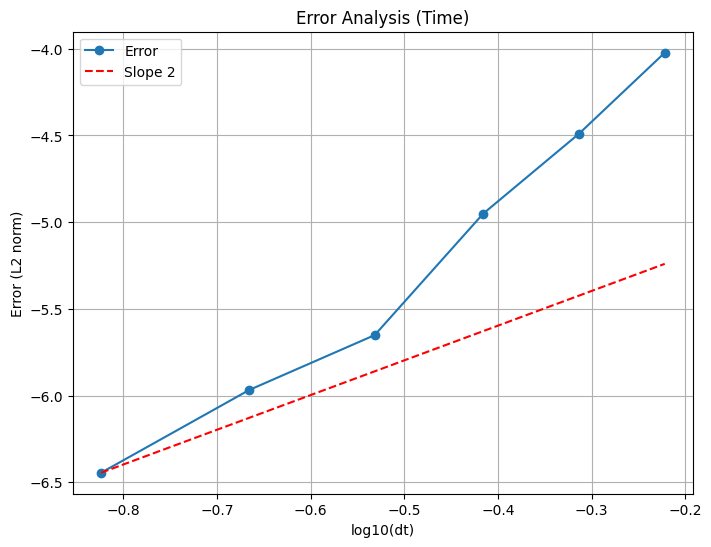

In [364]:
# analysis order of accuracy
plt.figure(figsize=(8, 6))
plt.plot(np.log10(t_list), np.log10(error_list), marker='o', label='Error')
plt.xlabel('log10(dt)')
plt.ylabel('Error (L2 norm)')
plt.plot(np.log10(t_list), 2 * (np.log10(t_list) - np.log10(t_list[0])) + np.log10(error_list[0]), linestyle='--', color='r', label='Slope 2')
plt.title('Error Analysis (Time)')
plt.grid()
plt.legend()
plt.show()
# time.sleep(0.02)  # Uncomment if you want to see the progress in real-time